In [17]:
import numpy as np
import pandas as pd


In [18]:
data = {
    "Attendance": [85, 90, 75, 60, 95],
    "Internal_Marks": [78, 88, 70, 65, 92],
    "Assignment_Score": [80, 85, 72, 68, 90],
    "Study_Hours": [12, 15, 10, 8, 18]
}

df = pd.DataFrame(data, index=["S1", "S2", "S3", "S4", "S5"])
df


,Attendance,Internal_Marks,Assignment_Score,Study_Hours
S1,85,78,80,12
S2,90,88,85,15
S3,75,70,72,10
S4,60,65,68,8
S5,95,92,90,18


In [19]:
mean_vector = df.mean()
mean_vector


Attendance          81.0
Internal_Marks      78.6
Assignment_Score    79.0
Study_Hours         12.6
dtype: float64

In [20]:
X_centered = df - mean_vector
X_centered


,Attendance,Internal_Marks,Assignment_Score,Study_Hours
S1,4.0,-0.6,1.0,-0.6
S2,9.0,9.4,6.0,2.4
S3,-6.0,-8.6,-7.0,-2.6
S4,-21.0,-13.6,-11.0,-4.6
S5,14.0,13.4,11.0,5.4


In [21]:
cov_matrix = np.cov(X_centered.T)
cov_matrix


array([[192.5 , 151.75, 121.25,  51.75],
       [151.75, 131.8 , 103.25,  45.05],
       [121.25, 103.25,  82.  ,  35.5 ],
       [ 51.75,  45.05,  35.5 ,  15.8 ]])

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors


(array([4.12356816e+02, 8.86362367e+00, 5.82150245e-01, 2.97409939e-01]),
 array([[ 0.67477468,  0.73132856, -0.07897157,  0.06000969],
        [ 0.55863046, -0.57289534, -0.59418742, -0.08163484],
        [ 0.44279744, -0.29556877,  0.7541114 , -0.38455888],
        [ 0.19115849, -0.22268493,  0.2683669 ,  0.91752333]]))

In [23]:
idx = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

sorted_eigenvalues, sorted_eigenvectors


(array([4.12356816e+02, 8.86362367e+00, 5.82150245e-01, 2.97409939e-01]),
 array([[ 0.67477468,  0.73132856, -0.07897157,  0.06000969],
        [ 0.55863046, -0.57289534, -0.59418742, -0.08163484],
        [ 0.44279744, -0.29556877,  0.7541114 , -0.38455888],
        [ 0.19115849, -0.22268493,  0.2683669 ,  0.91752333]]))

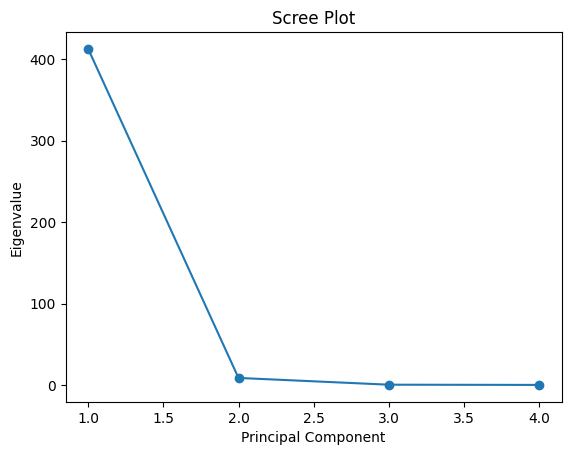

In [24]:
import matplotlib.pyplot as plt

# Scree Plot
plt.figure()
plt.plot(range(1, len(sorted_eigenvalues) + 1),
         sorted_eigenvalues,
         marker='o')

plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.show()


In [25]:
total_variance = np.sum(sorted_eigenvalues)
variance_ratio = sorted_eigenvalues / total_variance

variance_ratio


array([9.76917356e-01, 2.09988715e-02, 1.37917613e-03, 7.04595924e-04])

In [26]:
cumulative_variance = np.cumsum(variance_ratio)
cumulative_variance


array([0.97691736, 0.99791623, 0.9992954 , 1.        ])

In [27]:
PC1 = sorted_eigenvectors[:, 0]
PC1


array([0.67477468, 0.55863046, 0.44279744, 0.19115849])

In [28]:
X_pca_1D = np.dot(X_centered, PC1)
X_pca_1D



array([  2.6920228 ,  14.43966345, -12.44946417, -27.51774343,
        22.83552135])

In [29]:
df_pca = pd.DataFrame(X_pca_1D, index=df.index, columns=["PC1"])
print(df_pca)


          PC1
S1   2.692023
S2  14.439663
S3 -12.449464
S4 -27.517743
S5  22.835521
